In [58]:
import yfinance as yf

In [59]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [60]:
stock = 'NVDA'
nvidia_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [61]:
nvidia_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2005-06-15,0.205012,0.205929,0.196912,0.204324,1669788000
2005-06-16,0.206082,0.207457,0.201955,0.204935,489240000
2005-06-17,0.205623,0.208986,0.205089,0.208603,456348000
2005-06-20,0.208756,0.210132,0.202261,0.205623,606060000
2005-06-21,0.210742,0.211736,0.208145,0.210132,428172000


In [62]:
nvidia_data.shape

(5032, 5)

In [63]:
nvidia_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,13.337910,13.584800,13.067113,13.338405,5.339118e+08
std,30.130717,30.698985,29.516360,30.153112,3.178228e+08
min,0.135248,0.146252,0.131810,0.137541,4.564400e+07
25%,0.353014,0.357777,0.347746,0.352495,3.239670e+08
50%,0.688353,0.697292,0.675110,0.688517,4.671583e+08
75%,9.021889,9.161366,8.770280,9.120581,6.566698e+08
max,149.405869,153.105279,147.796143,153.005289,3.692928e+09


In [64]:
nvidia_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-06-15 to 2025-06-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   5032 non-null   float64
 1   (High, NVDA)    5032 non-null   float64
 2   (Low, NVDA)     5032 non-null   float64
 3   (Open, NVDA)    5032 non-null   float64
 4   (Volume, NVDA)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [65]:
nvidia_data.isna().sum()

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


Text(0.5, 1.0, 'Close Price History NVIDIA')

<Figure size 1500x500 with 0 Axes>

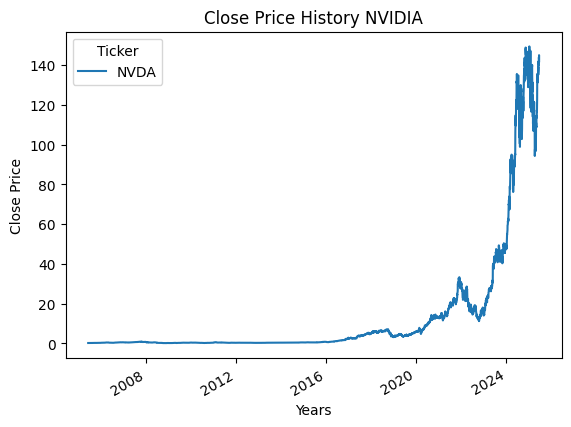

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
nvidia_data['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close Price History NVIDIA')

In [67]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel('Years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of NVIDIA")

In [68]:
nvidia_data.columns

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

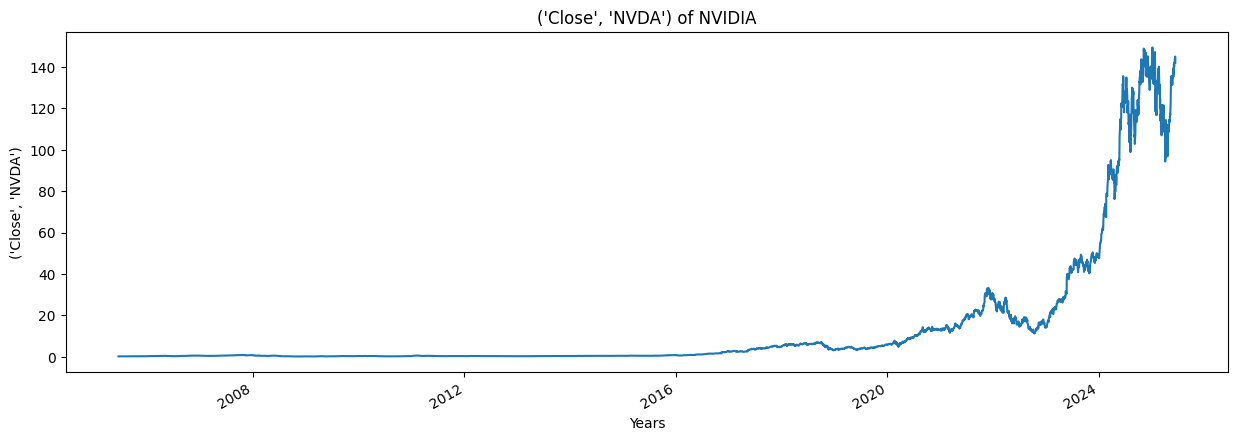

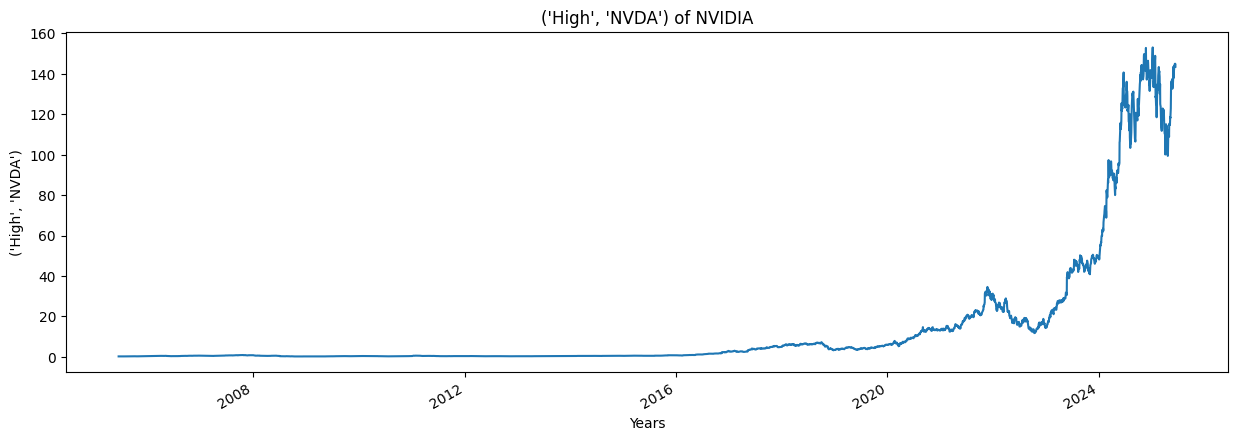

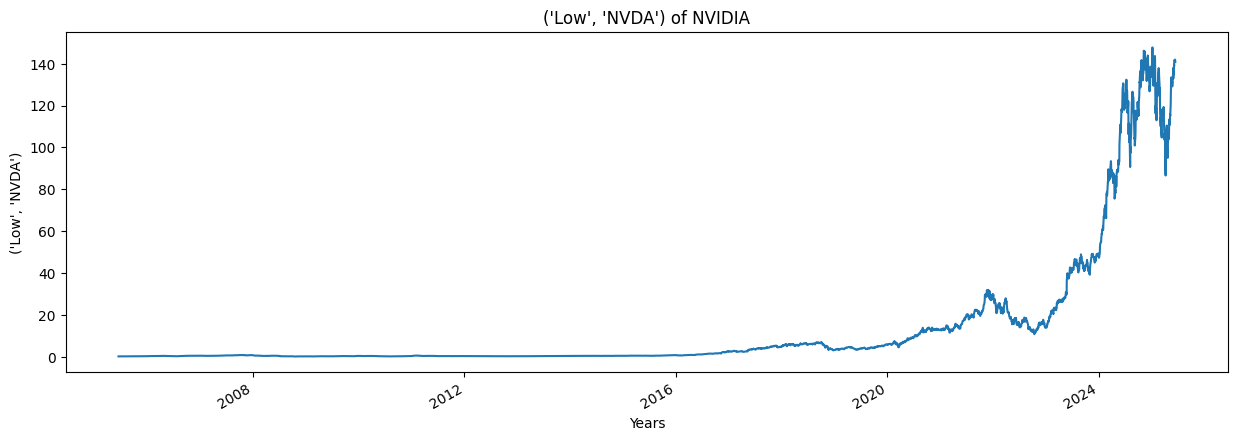

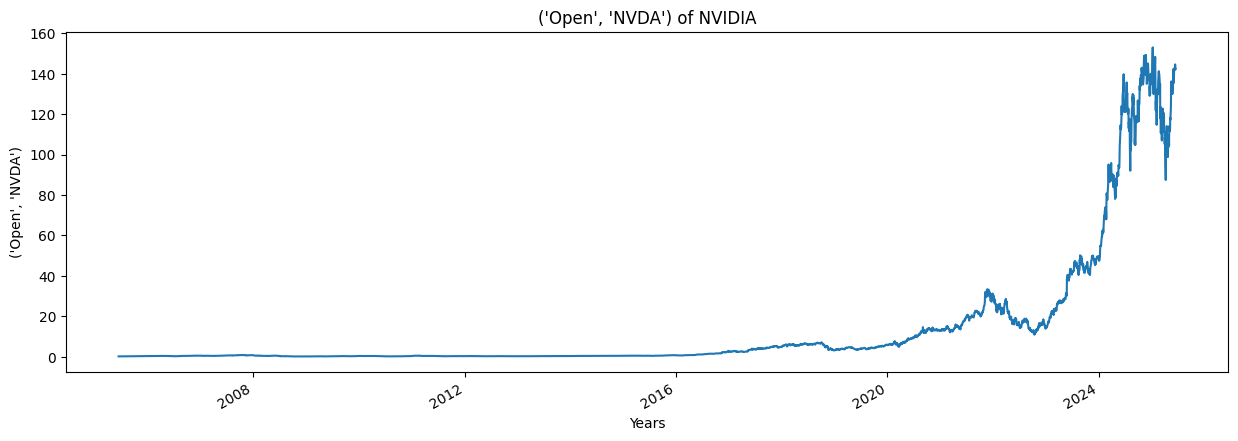

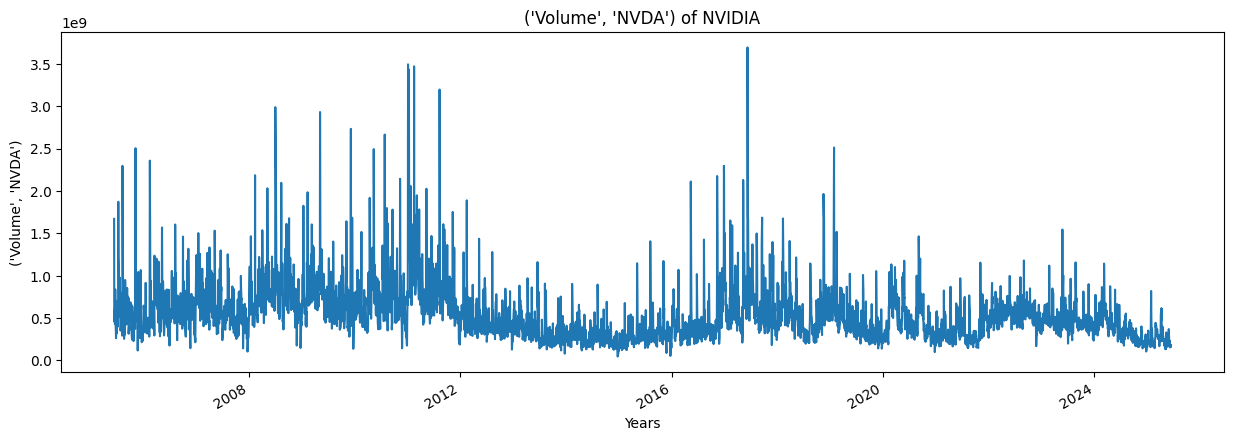

In [69]:
for column in nvidia_data.columns:
    plot_graph((15,5), nvidia_data[column], column)

In [70]:
for i in range(2005,2025):
  print(i, list(nvidia_data.index.year).count(i))

2005 139
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [71]:
nvidia_data['Moving_Avg_for_250_days'] = nvidia_data['Close'].rolling(250).mean()

In [72]:
nvidia_data['Moving_Avg_for_250_days'][0:250].tail()

,Moving_Avg_for_250_days
Date,
2006-06-06,NaN
2006-06-07,NaN
2006-06-08,NaN
2006-06-09,NaN
2006-06-12,0.304482


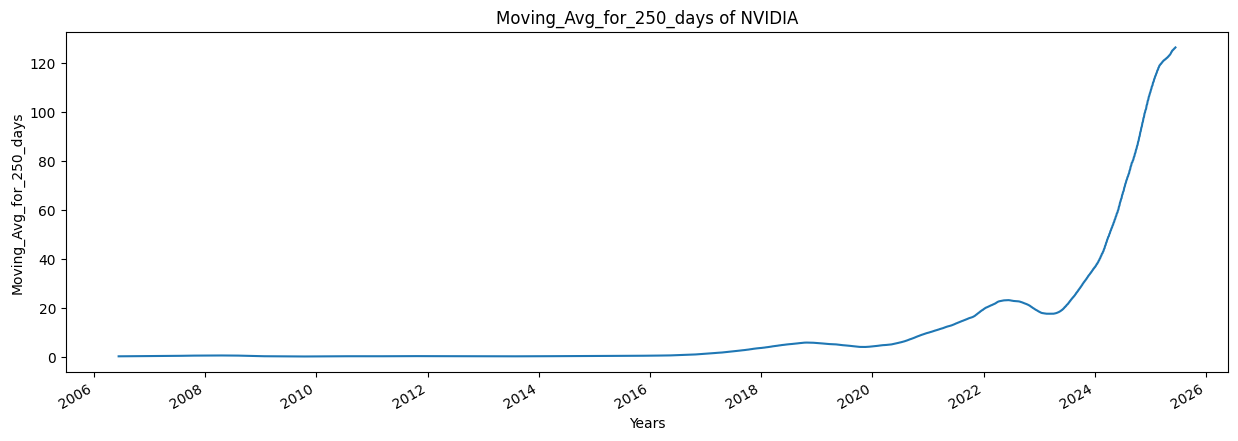

In [73]:
plot_graph((15,5), nvidia_data['Moving_Avg_for_250_days'], 'Moving_Avg_for_250_days')

<Figure size 1500x500 with 0 Axes>

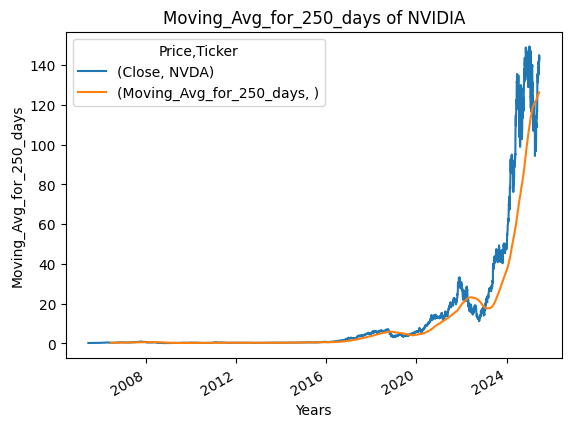

In [74]:
plot_graph((15,5), nvidia_data[['Close','Moving_Avg_for_250_days']], 'Moving_Avg_for_250_days')

<Figure size 1500x500 with 0 Axes>

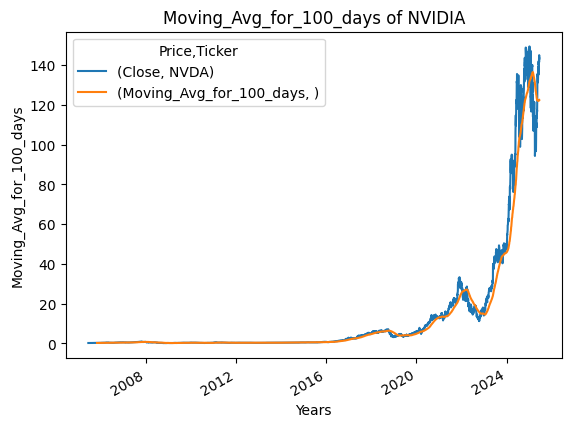

In [75]:
nvidia_data['Moving_Avg_for_100_days'] = nvidia_data['Close'].rolling(100).mean()
plot_graph((15,5), nvidia_data[['Close','Moving_Avg_for_100_days']], 'Moving_Avg_for_100_days')

<Figure size 1500x500 with 0 Axes>

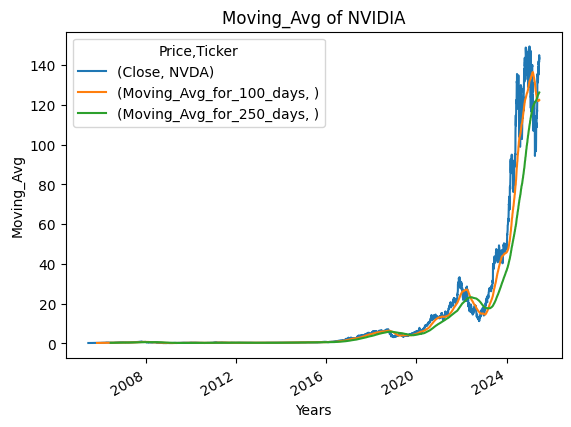

In [76]:
plot_graph((15,5), nvidia_data[['Close','Moving_Avg_for_100_days','Moving_Avg_for_250_days']], 'Moving_Avg')

In [77]:
nvidia_data['percentage_chg_closeprice'] = nvidia_data['Close'].pct_change()
nvidia_data[['Close','percentage_chg_closeprice']].head()

Price,Close,percentage_chg_closeprice
Ticker,NVDA,
Date,,
2005-06-15,0.205012,NaN
2005-06-16,0.206082,0.005219
2005-06-17,0.205623,-0.002225
2005-06-20,0.208756,0.015238
2005-06-21,0.210742,0.009514


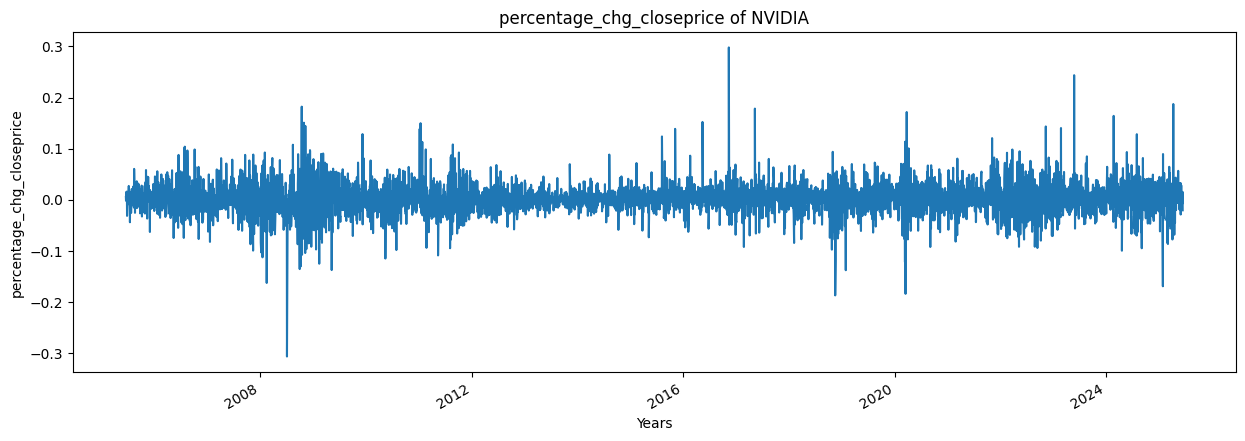

In [78]:
plot_graph((15,5), nvidia_data['percentage_chg_closeprice'], 'percentage_chg_closeprice')

In [79]:
Close_price = nvidia_data['Close']

In [80]:
# Normalizing data in the range of 0-1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[4.67361743e-04],
       [4.74530283e-04],
       [4.71458622e-04],
       ...,
       [9.55946678e-01],
       [9.70484021e-01],
       [9.50185326e-01]])

In [81]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np

x_data, y_data = np.array(x_data), np.array(y_data)

In [82]:
# Splitting data into training and testing data
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [85]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [87]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - loss: 2.8052e-05
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - loss: 3.8519e-06


In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [89]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [90]:
predictions

array([[0.02893802],
       [0.02901052],
       [0.02904646],
       ...,
       [0.84097505],
       [0.8425984 ],
       [0.8455639 ]], dtype=float32)

In [91]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_predictions

array([[  4.454844 ],
       [  4.465667 ],
       [  4.4710317],
       ...,
       [125.66811  ],
       [125.91043  ],
       [126.353096 ]], dtype=float32)

In [92]:
inverse_y_tests = scaler.inverse_transform(y_test)
inverse_y_tests

array([[  4.35025501],
       [  4.34404373],
       [  4.35969782],
       ...,
       [142.83000183],
       [145.        ],
       [141.97000122]])

In [93]:
rmse = np.sqrt(np.mean((inverse_predictions - inverse_y_tests)**2))
rmse

np.float64(5.6201801749964435)

In [94]:
import pandas as pd

plotting_data = pd.DataFrame(
    {
        "Original_test_data": inverse_y_tests.reshape(-1),
        "predictions": inverse_predictions.reshape(-1)
    },
    index = nvidia_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2019-07-26,4.350255,4.454844
2019-07-29,4.344044,4.465667
2019-07-30,4.359698,4.471032
2019-07-31,4.192467,4.477962
2019-08-01,4.098042,4.440773


<Figure size 1500x600 with 0 Axes>

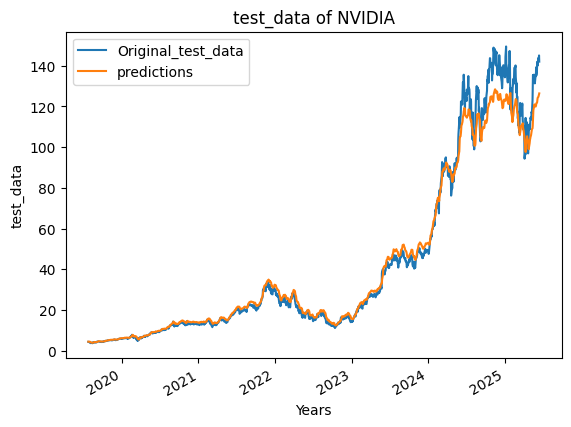

In [95]:
plot_graph((15,6), plotting_data, "test_data")

<Figure size 1500x600 with 0 Axes>

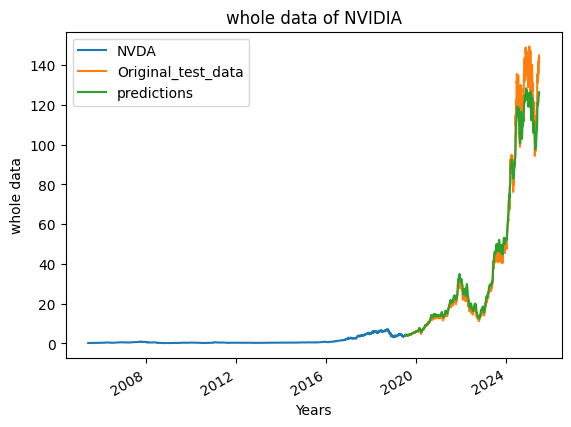

In [96]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')

In [97]:
model.save("Latest_stock_price_model.keras")